In [2]:
from run import full_train_test

In [3]:
N_TRAIN_SAMPLES = 30000
N_VALI_SAMPLES = 5000
N_ITER = 1
N_EPOCHS = 6
BATCH_SIZE = 250

Iteration 1
Epoch: 1 / 6 
 Train loss: 0.0473 - Test loss:0.0865 
 Train acc: 0.4438 - Test acc: 0.4568
Epoch: 2 / 6 
 Train loss: 0.0266 - Test loss:0.0718 
 Train acc: 0.7314 - Test acc: 0.7334
Epoch: 3 / 6 
 Train loss: 0.0162 - Test loss:0.0624 
 Train acc: 0.7618 - Test acc: 0.7600
Epoch: 4 / 6 
 Train loss: 0.0099 - Test loss:0.0564 
 Train acc: 0.7658 - Test acc: 0.7656
Epoch: 5 / 6 
 Train loss: 0.0061 - Test loss:0.0527 
 Train acc: 0.7662 - Test acc: 0.7678
Epoch: 6 / 6 
 Train loss: 0.0038 - Test loss:0.0506 
 Train acc: 0.7662 - Test acc: 0.7674


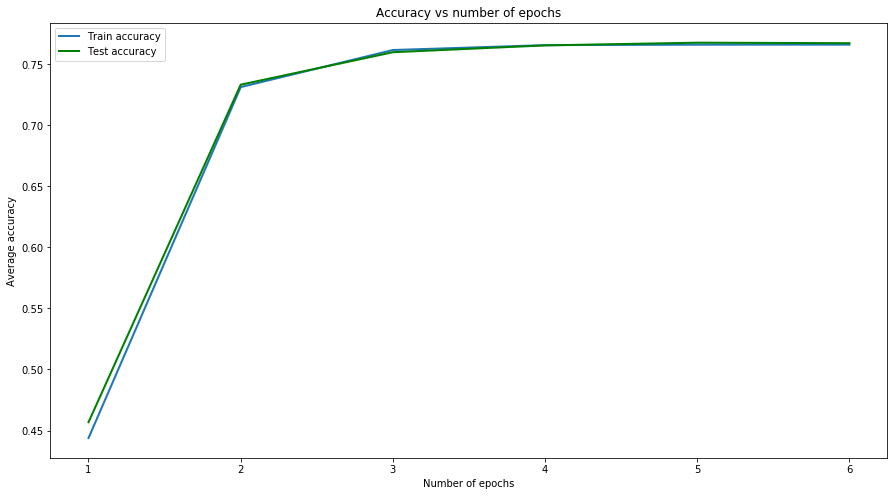

Test accuracy mean = 0.7598


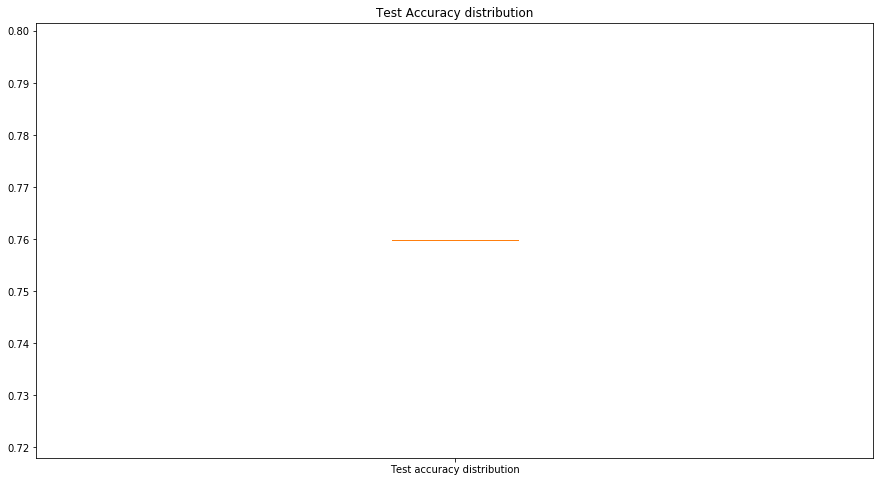

Accuracy: 0.760 +/- 0.000
Iteration time:  8.894 +/- 0.000 seconds


In [5]:
full_train_test("BCD",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS,d1 = 100, d2 = 100, d3 = 200, verbose = True )

Iteration 1
Epoch: 1 / 2 
 Train loss: 0.9784 - Test loss:0.9812 
 Train acc: 0.5628 - Test acc: 0.5448
Epoch: 2 / 2 
 Train loss: 0.6202 - Test loss:0.6283 
 Train acc: 0.7576 - Test acc: 0.7586


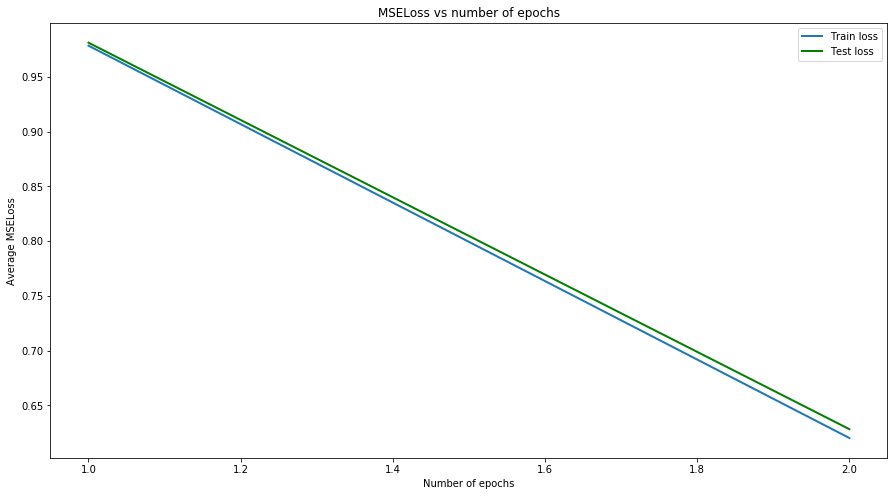

Train accuracy mean = 0.7575666666666666
Test accuracy mean = 0.8278


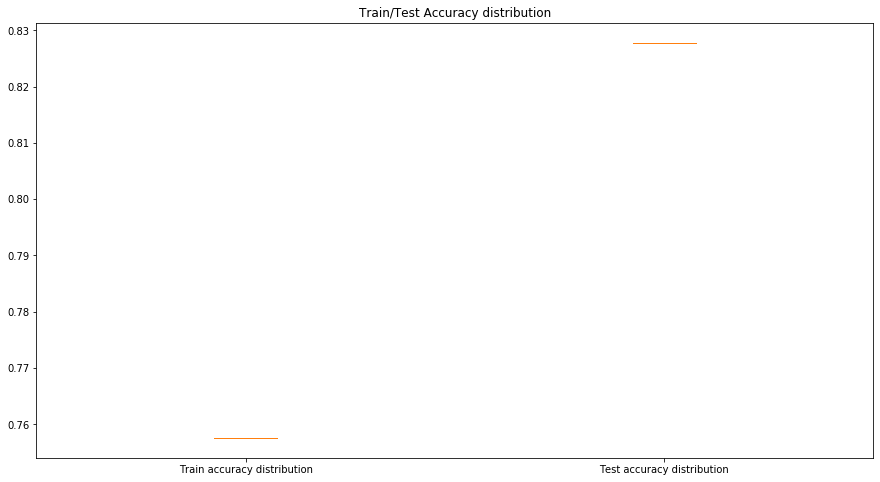

Accuracy: 0.828 +/- 0.000
Iteration time:  17.061 +/- 0.000 seconds


In [5]:
full_train_test("DFW",N_TRAIN_SAMPLES, N_VALI_SAMPLES, N_ITER, N_EPOCHS, BATCH_SIZE, verbose = True)